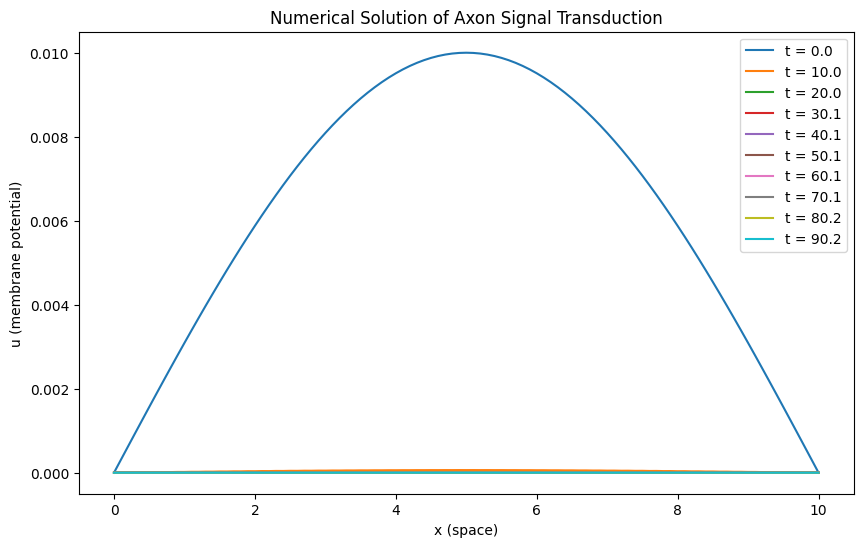

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define parameters
D = 0.1  # Diffusion coefficient
l = 10   # Length of the domain
T = 100  # Total simulation time

# Spatial grid
dx = 0.1  # Spatial step size
x = np.arange(0, l + dx, dx)  # Spatial points

# Initial condition: small perturbation around u = 0
u0 = 0.01 * np.sin(np.pi * x / l)

# Define the reaction term
def f(u):
    return u * (1 - u) * (u - 0.5)

# Define the model equation as a system of ODEs
def dudt(t, u):
    dudx2 = np.zeros_like(u)  # Second spatial derivative
    dudx2[1:-1] = (u[:-2] - 2 * u[1:-1] + u[2:]) / dx**2
    dudx2[0] = dudx2[-1] = 0  # Neumann boundary conditions
    return D * dudx2 + f(u)

# Solve the PDE using an ODE solver
sol = solve_ivp(dudt, [0, T], u0, method='RK45', t_eval=np.linspace(0, T, 500))

# Extract solution
u = sol.y

# Plot results
plt.figure(figsize=(10, 6))
for i, t in enumerate(sol.t):
    if i % 50 == 0:  # Plot every 50th timestep
        plt.plot(x, u[:, i], label=f"t = {t:.1f}")

plt.xlabel("x (space)")
plt.ylabel("u (membrane potential)")
plt.title("Numerical Solution of Axon Signal Transduction")
plt.legend()
plt.show()
